## Linear Regression

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

### Loading Boston housing price dataset

In [3]:
boston = datasets.load_boston() # Predicting House prices
X = boston.data
y = boston.target

#### You can refer here for more information
#### https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [4]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


### Sample plots of Input features and Target Variable

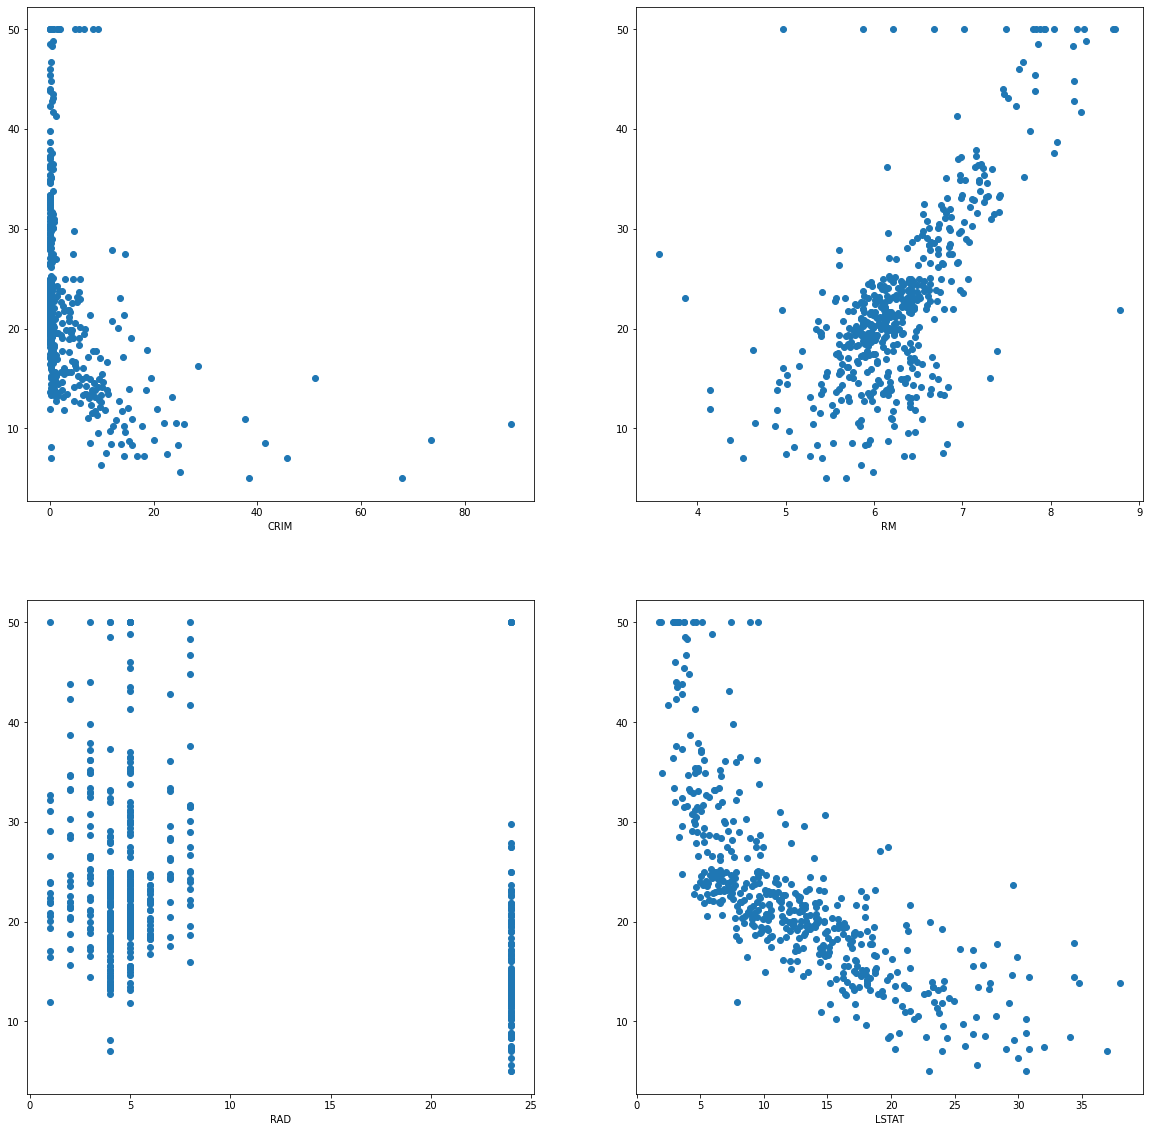

In [5]:
fig, axs = plt.subplots(2,2,figsize=(20,20))

axs[0, 0].scatter(X[:,0], y)
axs[0, 0].set(xlabel = boston.feature_names[0])
axs[0, 1].scatter(X[:,5], y)
axs[0, 1].set(xlabel = boston.feature_names[5])
axs[1, 0].scatter(X[:,8], y)
axs[1, 0].set(xlabel = boston.feature_names[8])
axs[1, 1].scatter(X[:,12], y)
axs[1, 1].set(xlabel = boston.feature_names[12])
plt.show()


### Test-Train split

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 1)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((404, 13), (102, 13), (404,), (102,))

### Standardizing features

In [7]:
# scaler = StandardScaler()
# Xtrain = scaler.fit_transform(Xtrain)
# Xtest  = scaler.fit_transform(Xtest)
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Fitting data in Linear Regression function

In [8]:
l_reg = LinearRegression()
model = l_reg.fit(Xtrain,ytrain)
preds = model.predict(Xtest)

### Parameters of our hypothesis equation

In [9]:
print('Coefficient: \n',model.coef_) 
print('Intercept: ',model.intercept_)

Coefficient: 
 [-1.02670073  1.35041325  0.12557673  0.57522815 -2.28609206  2.13083882
  0.12702443 -3.17856741  2.64730569 -1.87781254 -2.14296387  0.6693739
 -3.92551025]
Intercept:  22.52227722772279


### R-Squared Value

In [10]:
print('R^2 value: ',r2_score(ytest,preds))

R^2 value:  0.7634174432138472


### Mean Squared error

In [11]:
print('MSE value: ',mean_squared_error(ytest,preds))

MSE value:  23.38083648027022


### Actual vs Predicted values

In [12]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': preds.flatten()})
df.sample(10)

,Actual,Predicted
0,28.2,32.655032
13,19.4,26.852002
36,14.9,17.599388
89,18.1,16.980067
20,16.2,20.802039
10,23.7,27.040810
53,23.8,26.660328
58,17.5,16.855984
61,26.6,27.519289
69,22.7,25.148687
